# * Copyright (C) Jonathan Kernaghan - All Rights Reserved
# * Unauthorized copying of this file, via any medium is strictly prohibited
# * Proprietary and confidential
# * Written by Jonathan Kernaghan <jkernaghan272@gmail.com>, December 2022

Information - For this task of multiclass classification, which is the prediction of three or more labels, I have used the "iris" dataset, whereby my target varaible i.e. the thing I will be predicting is the species of flower label based on the other variables sepal length, sepal width, petal length and petal width.

This jupyter notebook contains exploratory data analysis, which is useful for learning about the dataset, determining the transformations required to clean the data as well as feature engineering steps.

Please see scripts/2_multiclass_classification_example.py for the model creation and evaluation in the form of a pipeline.

In [54]:
import seaborn as sns

In [55]:
# Load the data
iris = sns.load_dataset("iris")

In [56]:
# Take a look at 10 sample from the iris dataset, each row is one observation of a flower, its species and measurements
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
41,4.5,2.3,1.3,0.3,setosa
13,4.3,3.0,1.1,0.1,setosa
19,5.1,3.8,1.5,0.3,setosa
57,4.9,2.4,3.3,1.0,versicolor
56,6.3,3.3,4.7,1.6,versicolor
118,7.7,2.6,6.9,2.3,virginica
113,5.7,2.5,5.0,2.0,virginica
78,6.0,2.9,4.5,1.5,versicolor
31,5.4,3.4,1.5,0.4,setosa
5,5.4,3.9,1.7,0.4,setosa


In [57]:
# Lets do a quick exploratory data analysis (EDA)
print("Rows x Columns =", iris.shape, "\n")
print("Feature names =", iris.columns, "\n")
print(iris.info())

Rows x Columns = (150, 5) 

Feature names = Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [58]:
# Continuous variable statistics
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


[Text(0.5, 1.0, 'Distribution of Species')]

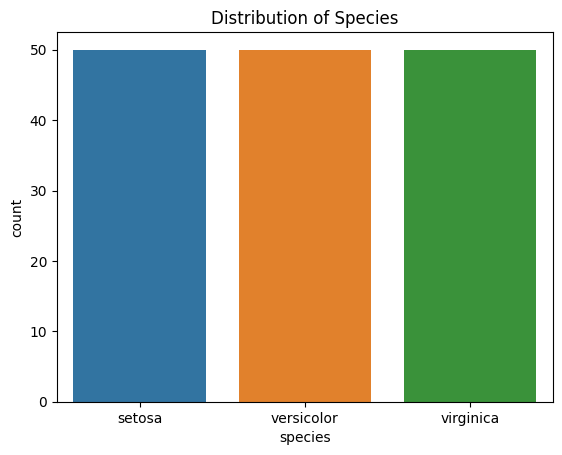

In [59]:
sns.countplot(data=iris, x="species").set(title="Distribution of Species")

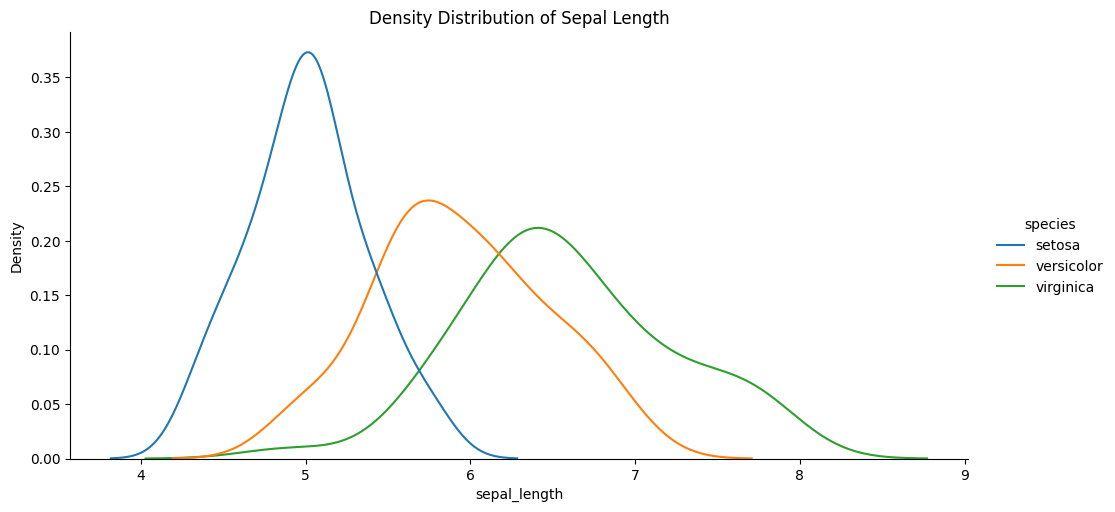

In [60]:
sns.displot(data=iris, kind="kde", x="sepal_length", hue="species", aspect=2).set(title="Density Distribution of Sepal Length")

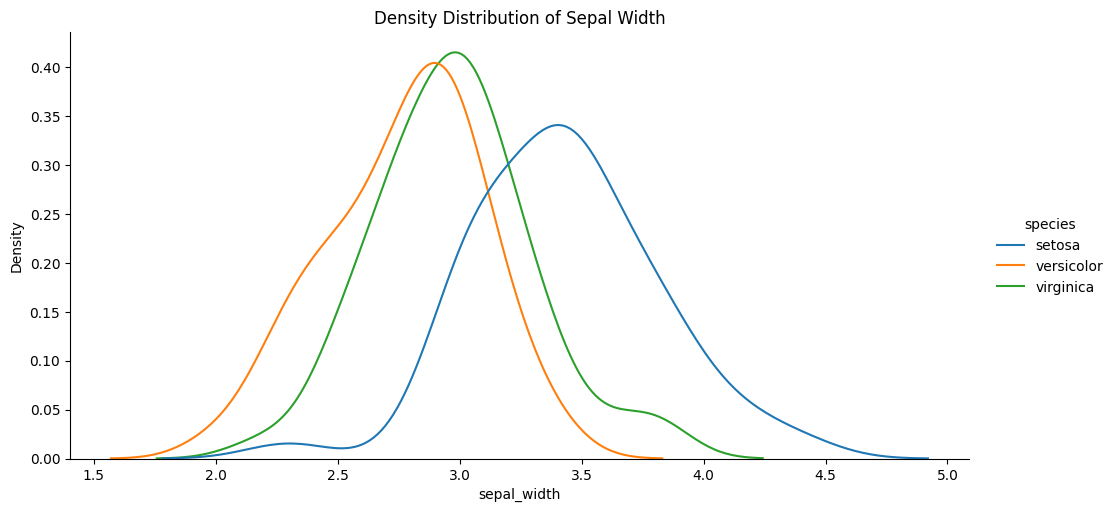

In [61]:
sns.displot(data=iris, kind="kde", x="sepal_width", hue="species", aspect=2).set(title="Density Distribution of Sepal Width")

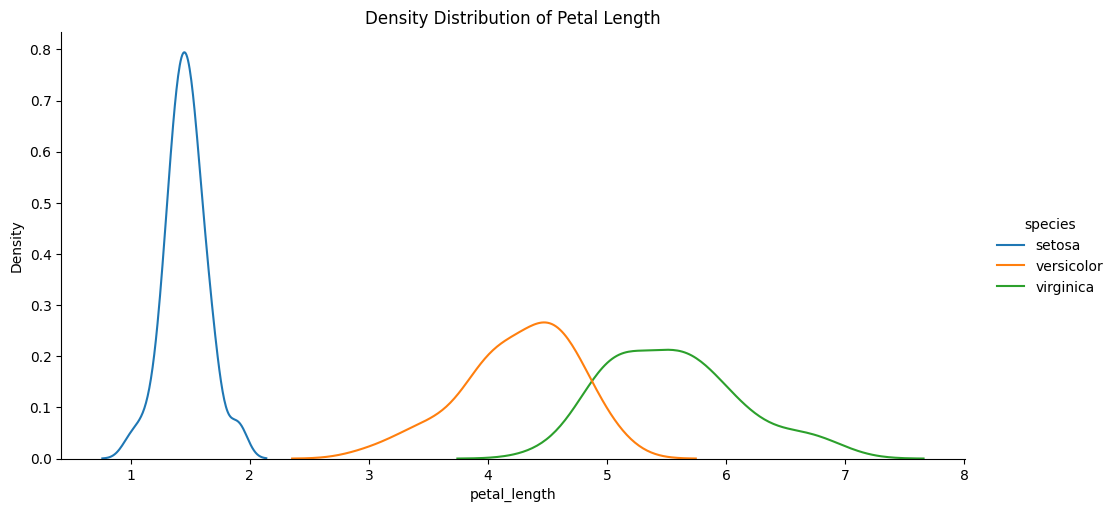

In [62]:
sns.displot(data=iris, kind="kde", x="petal_length", hue="species", aspect=2).set(title="Density Distribution of Petal Length")

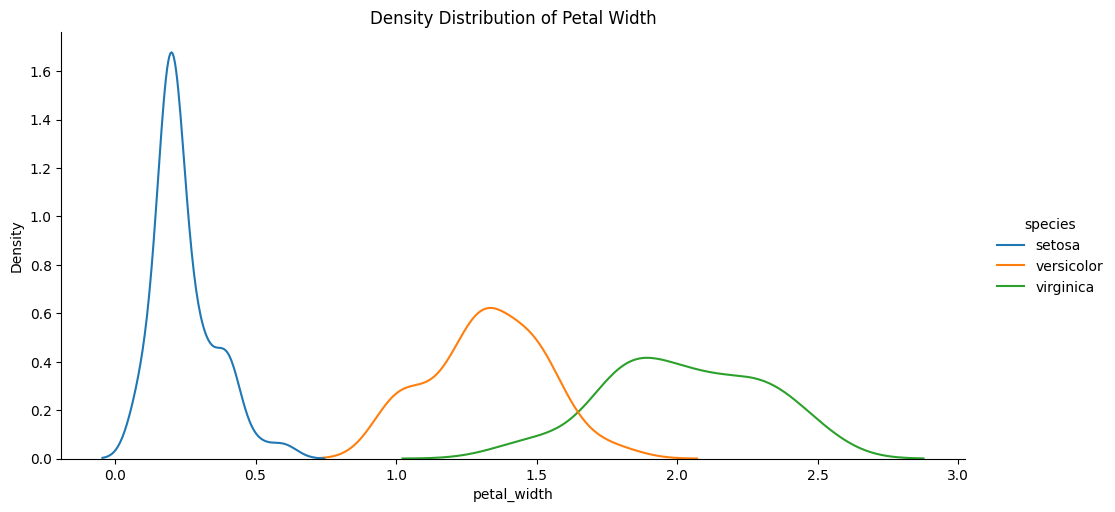

In [63]:
sns.displot(data=iris, kind="kde", x="petal_width", hue="species", aspect=2).set(title="Density Distribution of Petal Width")

In [64]:
# Encoding the Species Feature for modelling as multiclass target
target_dict = {c: i for i, c in enumerate(iris.species.unique())}
iris["species_encoded"] = iris["species"].map(target_dict)

In [65]:
# Raw correlation values
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width,species_encoded
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
species_encoded,0.782561,-0.426658,0.949035,0.956547,1.000000


[Text(0.5, 1.0, 'Heatmap of Correlations')]

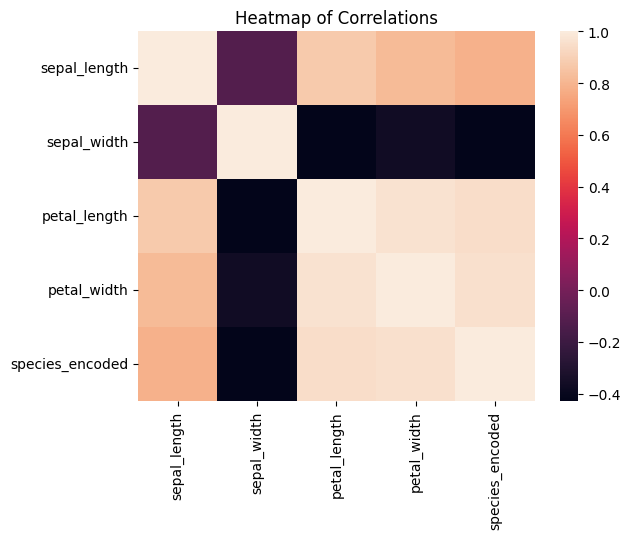

In [66]:
# Heatmap of raw correlation values
sns.heatmap(iris.corr()).set(title="Heatmap of Correlations")

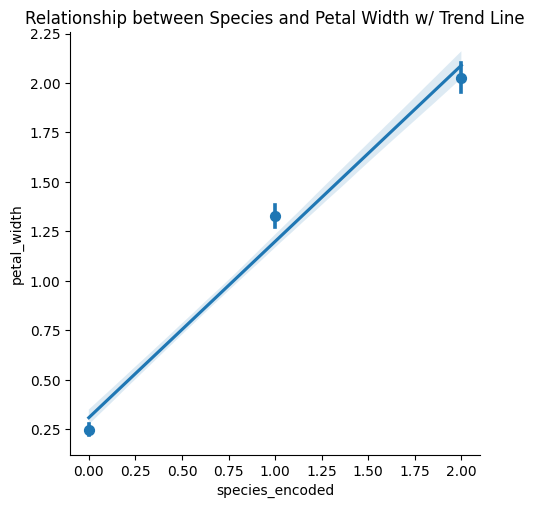

In [67]:
import numpy as np
sns.lmplot(data=iris, x="species_encoded", y="petal_width", x_estimator=np.mean).set(title="Relationship between Species and Petal Width w/ Trend Line")

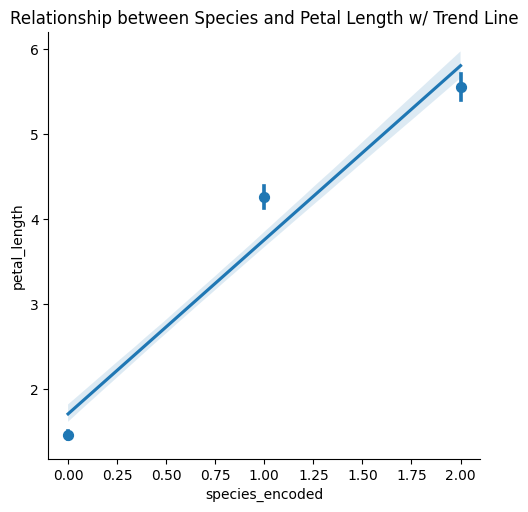

In [68]:
sns.lmplot(data=iris, x="species_encoded", y="petal_length", x_estimator=np.mean).set(title="Relationship between Species and Petal Length w/ Trend Line")

Recommendations and key observations -
1) Small dataset of 150 rows, use 5-fold cross validation
2) No need to deal with missing values, there are none
3) Dataset has perfect class balance
4) Target variable is evenly distributed
5) Use SVM/SVC as baseline
6) Use all variables, collinearity not high enough to represent same variance
7) Encode target with label encoding
8) No need to normalise as all measured on same scale with similar ranges
9) All predictors are extremely strong, with good seperation in the distributions by species